In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


Loading and preprocessing the Dataset

In [3]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Performing PCA

In [5]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca['target'] = df_pca['target'].map({0: target_names[0], 1: target_names[1]})

Plotting PCA Components

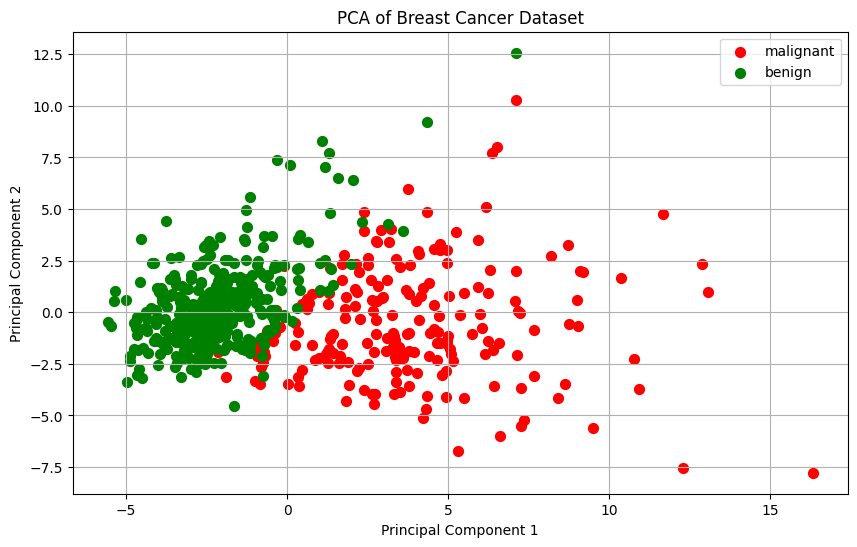

PCA performed and plotted successfully.


In [9]:
# Plot PCA components
plt.figure(figsize=(10, 6))
targets = target_names
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca['target'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'PC1'],
                df_pca.loc[indicesToKeep, 'PC2'],
                c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Breast Cancer Dataset')
plt.grid()
plt.show()

print("PCA performed and plotted successfully.")

''''
Malignant: Describes tumors or malignant cells that have the potential to spread to other body parts. Malignant tumors are harmful and need to be treated by a physician.
Benign: Describes tumors or non-cancerous cells that do not metastasize to other bodily areas. Although benign tumors often pose little threat to life, their location and size may nonetheless necessitate medical attention.
''''''
''''
The scatter plot displays the data points from the PCA-derived principle components (PC1 and PC2) for the breast cancer dataset.
Every data point is a sample of a tumor.
The class labels—benign (green) and malignant (red)—are used to color the points.
The way the two classes are divided in the plot can be understood as follows:
Given that the classes in the plot are clearly divided, it may be concluded that the primary components effectively distinguish between benign and malignant tumors.
But since some of the groups overlap or are not well defined, it appears possible that the primary components might not be able to accurately differentiate between benign and malignant tumors using the information provided. 

This could indicate that more characteristics are required for a more effective separation or that the dataset is not easily separable.

The variance of the data along such dimensions is indicated by the direction and distribution of the data points along the major components. Plot points that are wider apart can indicate higher variance along those main components.
'''''


In [12]:
# Interpretation of reduction
explained_variance_ratio = pca.explained_variance_ratio_
print("\nInterpretation of Reduction:")
print("Explained Variance Ratio (PC1, PC2):", explained_variance_ratio)



Interpretation of Reduction:
Explained Variance Ratio (PC1, PC2): [0.44272026 0.18971182]


PC1 explains 44.27% of the total variance, capturing the largest amount of information from the original features.
PC2 explains 18.97% of the total variance, capturing additional variability not explained by PC1.
Together, PC1 and PC2 capture 63.24% of the total variance, indicating a meaningful reduction in dimensionality.
The plot of PC1 and PC2 shows a clear separation between malignant and benign tumors, indicating that these principal components capture important patterns in the data, however, with lateral overlap at the meet point.

#Logistic Regression for Prediction

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Implement Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Logistic Regression Results:
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Accuracy: The model correctly classified approximately 99.12% of the breast cancer samples.
Precision:

Class 0 (benign): All samples predicted as benign are actually benign (100% precision).
Class 1 (malignant): Approximately 99% of samples predicted as malignant are actually malignant.

Recall (or Sensitivity):
Class 0 (benign): The model correctly identified approximately 98% of the actual benign samples.
Class 1 (malignant): The model correctly identified all malignant samples (100% recall).

F1-score:
Class 0 (benign): The F1-score, which balances precision and recall, is approximately 99%.
Class 1 (malignant): The F1-score is also approximately 99%.

Support:
Class 0 (benign): There are 43 actual benign samples.
Class 1 (malignant): There are 71 actual malignant samples.

Macro avg and weighted avg:
Macro avg: The unweighted mean of precision, recall, and F1-score across all classes.
Weighted avg: The weighted mean of precision, recall, and F1-score across all classes, with support as the weight.

In summary, the logistic regression model shows excellent performance in classifying breast cancer samples, with high accuracy, precision, recall, and F1-score for both classes.